In [1]:
import time
import ROOT
import tensorflow as tf
import config
import data
import models
import train

Welcome to JupyROOT 6.18/04


In [2]:
conf = config.process_config("config/single_par_test.json")
model = models.get_trained_model(conf)

Model: "ppe_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 128)       14

In [3]:
h = ROOT.TH1F("test", "test", 100, -2000, 2000)

In [4]:
test_ds = data.get_test_ds(conf.input_dirs, conf.img_shape)
test_ds = test_ds.batch(64)

In [5]:
start_time = time.time()
for x, y in test_ds:
    predictions = model.model.predict(x)
    for i in range(len(predictions)):
        h.Fill(float(predictions[i] - y["lepEnergy"][i]))
print("--- %s seconds ---" % (time.time() - start_time))

--- 16.10862398147583 seconds ---


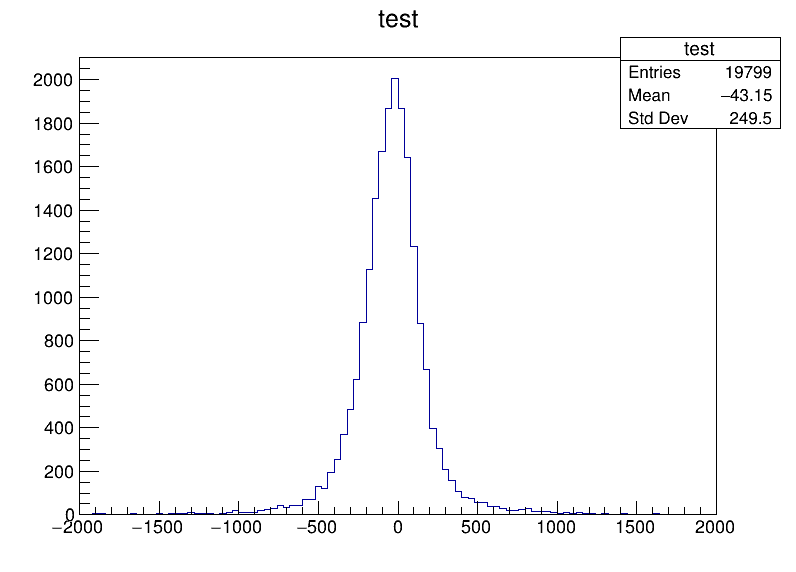

In [7]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()
c.Draw()

In [20]:
channels = conf.shape[]

random = tf.random.uniform(shape=[64,64,64,1], minval=0.8, maxval=1.2)

random = tf.random.uniform(shape=[64,64,64,3], minval=0.8, maxval=1.2)


for example in test_ds.take(1):
    print(example[0].shape)
    print(random.shape)
    output = tf.multiply(example[0], random)
    print(output.shape)

(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
